# Classification

Cevabı evet ya da hayır olan sorulara verilen cevapları tahmin etmek için kullanılır.

Metrikler: Confusion Matrix, Accuracy, Precision, Recall, F1 Score

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

### Data Importing

In [2]:
df = pd.read_csv('hr_data.csv')

### Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [5]:
df.shape

(1470, 35)

In [6]:
df.describe().T # Transpoze yani satır ve sütunları yer değiştirir.

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.000000,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.000000,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.000000,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.000000,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.000000,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.750000,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.000000,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.750000,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.000000,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.000000,5.0


In [7]:
df.sample()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
128,22,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,169,3,Male,100,3,1,Laboratory Technician,4,1,2523.0,19299,0,Y,No,14,3,3,80,1,3,2,3,2,1,2,1,No


In [8]:
# Attrition = İşten ayrılma durumu

In [9]:
df.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [10]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [11]:
df['Attrition'].value_counts()

Attrition
No     1020
Yes     185
Name: count, dtype: int64

Hedefimiz Attrition sütunundaki boş verileri tahmin etmek olacak.

In [12]:
import seaborn as sns

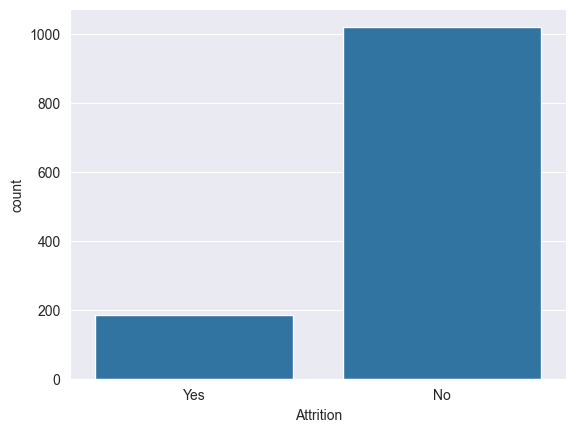

In [13]:
sns.countplot(x='Attrition', data=df);

In [14]:
d = {'Yes': 1, 'No': 0}

In [15]:
df['Attrition'] = df['Attrition'].map(d)

In [16]:
df['Attrition'].value_counts()

Attrition
0.0    1020
1.0     185
Name: count, dtype: int64

In [17]:
bos = df[ df.Attrition.isnull() ]
dolu = df[ df.Attrition.notnull() ]

In [18]:
dolu.shape, bos.shape

((1205, 35), (265, 35))

In [19]:
x = dolu.drop('Attrition', axis=1)
y = dolu.Attrition

In [20]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


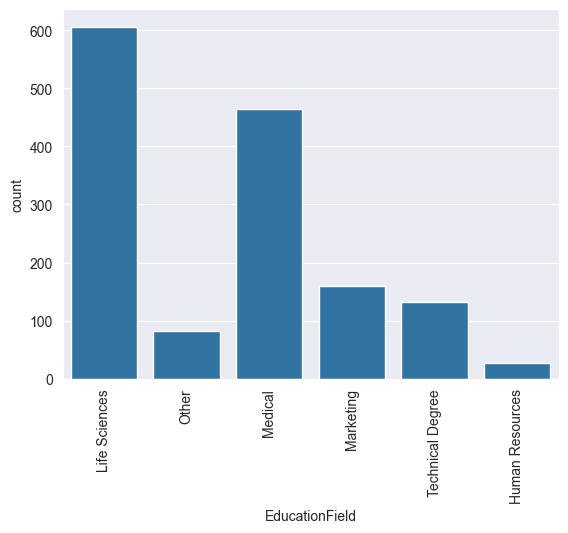

In [21]:
sns.countplot(x=df.EducationField);
plt.xticks(rotation=90);

In [22]:
x = pd.get_dummies(x, drop_first=True) # get_dummies: One Hot Encoding yani kategorik değişkenleri sayısal değişkenlere çevirir.

In [23]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,2,5993.0,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,49,279,8,1,1,2,3,61,2,2,2,1,5130.0,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,37,1373,2,2,1,4,4,92,2,1,3,2,2090.0,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True
3,33,1392,3,4,1,5,4,56,3,1,3,1,2909.0,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,27,591,2,1,1,7,1,40,3,1,2,1,3468.0,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
df.shape, x.shape, x_train.shape, x_test.shape

((1470, 35), (1205, 46), (964, 46), (241, 46))

In [27]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [28]:
g = GaussianNB()
b = BernoulliNB()

In [29]:
g.fit(x_train, y_train)

GaussianNB()

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
gtahmin = g.predict(x_test)

In [32]:
accuracy_score(y_test, gtahmin)

0.7883817427385892

In [33]:
confusion_matrix(y_test, gtahmin)

array([[171,  40],
       [ 11,  19]])

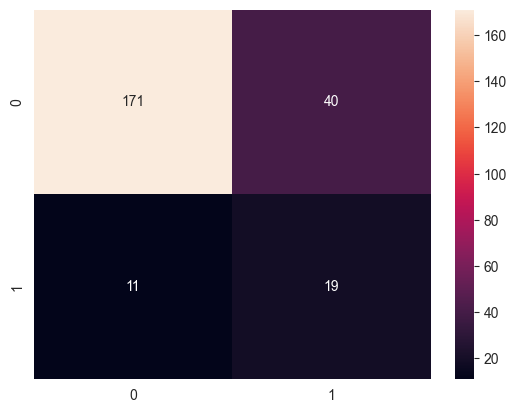

In [34]:
sns.heatmap(confusion_matrix(y_test, gtahmin), annot=True, fmt='d');

In [35]:
print( classification_report(gtahmin, y_test) )

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       182
         1.0       0.63      0.32      0.43        59

    accuracy                           0.79       241
   macro avg       0.72      0.63      0.65       241
weighted avg       0.77      0.79      0.76       241



In [36]:
b.fit(x_train, y_train)

BernoulliNB()

In [37]:
btahmin = b.predict(x_test)

In [38]:
accuracy_score(btahmin, y_test)

0.8257261410788381

In [39]:
confusion_matrix(btahmin, y_test)

array([[192,  23],
       [ 19,   7]])

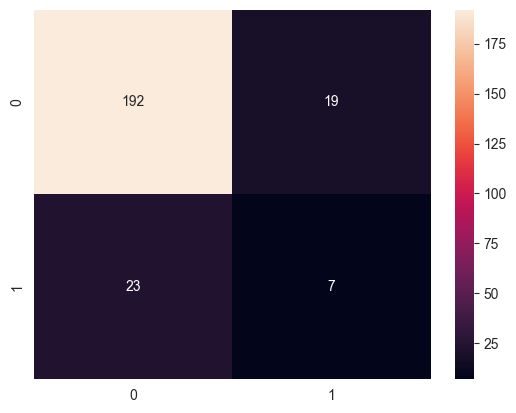

In [40]:
sns.heatmap(confusion_matrix(y_test, btahmin), annot=True, fmt='d');

In [41]:
print( classification_report(btahmin, y_test) )

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       215
         1.0       0.23      0.27      0.25        26

    accuracy                           0.83       241
   macro avg       0.57      0.58      0.58       241
weighted avg       0.84      0.83      0.83       241



In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
l = LogisticRegression()

In [44]:
l.fit(x_train, y_train)

LogisticRegression()

In [45]:
ltahmin = l.predict(x_test)

In [46]:
accuracy_score(y_test, ltahmin)

0.8672199170124482

In [47]:
confusion_matrix(y_test, ltahmin)

array([[209,   2],
       [ 30,   0]])

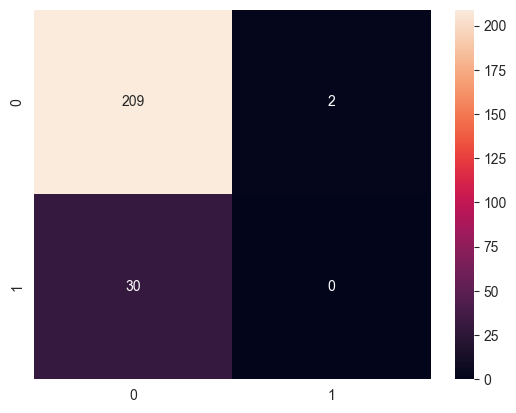

In [48]:
sns.heatmap(confusion_matrix(y_test, ltahmin), annot=True, fmt='d');

In [49]:
print( classification_report(y_test, ltahmin) )

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       211
         1.0       0.00      0.00      0.00        30

    accuracy                           0.87       241
   macro avg       0.44      0.50      0.46       241
weighted avg       0.77      0.87      0.81       241



In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
d = DecisionTreeClassifier()

In [52]:
d.fit(x_train, y_train)

DecisionTreeClassifier()

In [53]:
dtahmin = d.predict(x_test)

In [54]:
accuracy_score(y_test, dtahmin)

0.7759336099585062

In [55]:
confusion_matrix(y_test, dtahmin)

array([[180,  31],
       [ 23,   7]])

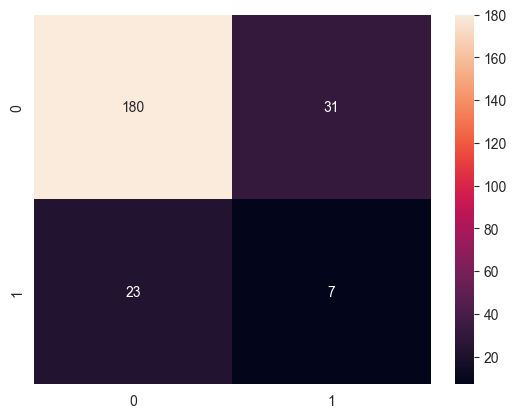

In [56]:
sns.heatmap(confusion_matrix(y_test, dtahmin), annot=True, fmt='d');

In [57]:
print( classification_report(y_test, dtahmin) )

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       211
         1.0       0.18      0.23      0.21        30

    accuracy                           0.78       241
   macro avg       0.54      0.54      0.54       241
weighted avg       0.80      0.78      0.79       241



In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
r = RandomForestClassifier()

In [60]:
r.fit(x_train, y_train)

RandomForestClassifier()

In [61]:
rtahmin = r.predict(x_test)

In [62]:
accuracy_score(y_test, rtahmin)

0.8796680497925311

In [63]:
confusion_matrix(y_test, rtahmin)

array([[210,   1],
       [ 28,   2]])

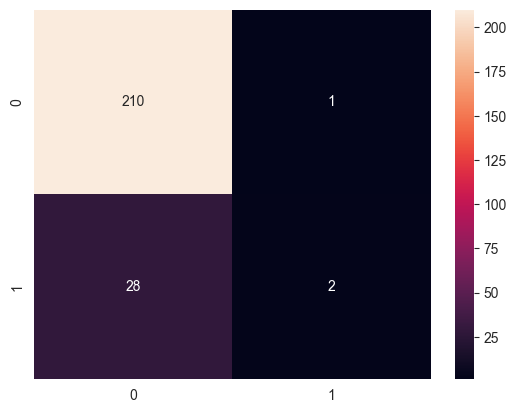

In [64]:
sns.heatmap(confusion_matrix(y_test, rtahmin), annot=True, fmt='d');

In [65]:
print( classification_report(y_test, rtahmin) )

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       211
         1.0       0.67      0.07      0.12        30

    accuracy                           0.88       241
   macro avg       0.77      0.53      0.53       241
weighted avg       0.86      0.88      0.83       241



In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gb = GradientBoostingClassifier()

In [68]:
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [69]:
gbtahmin = gb.predict(x_test)

In [70]:
accuracy_score(y_test, gbtahmin)

0.8879668049792531

In [71]:
confusion_matrix(y_test, gbtahmin)

array([[208,   3],
       [ 24,   6]])

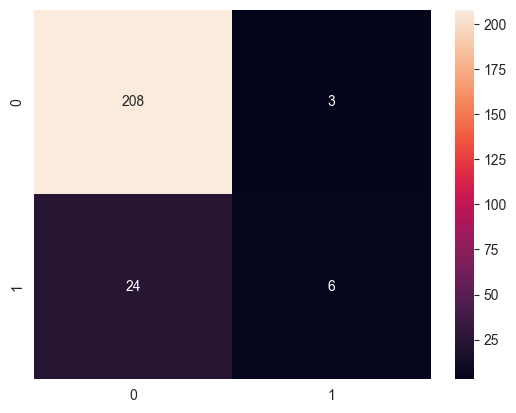

In [72]:
sns.heatmap(confusion_matrix(y_test, gbtahmin), annot=True, fmt='d');

In [73]:
print( classification_report(y_test, gbtahmin) )

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       211
         1.0       0.67      0.20      0.31        30

    accuracy                           0.89       241
   macro avg       0.78      0.59      0.62       241
weighted avg       0.87      0.89      0.86       241



In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
k = KNeighborsClassifier()

In [76]:
k.fit(x_train, y_train)

KNeighborsClassifier()

In [82]:
ktahmin = k.predict(x_test)

In [83]:
accuracy_score(y_test, ktahmin)

0.8547717842323651

In [84]:
confusion_matrix(y_test, ktahmin)

array([[205,   6],
       [ 29,   1]])

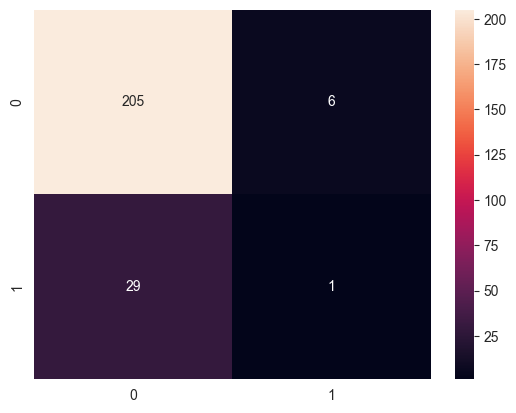

In [85]:
sns.heatmap(confusion_matrix(y_test, ktahmin), annot=True, fmt='d');

In [86]:
print( classification_report(y_test, ktahmin) )

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       211
         1.0       0.14      0.03      0.05        30

    accuracy                           0.85       241
   macro avg       0.51      0.50      0.49       241
weighted avg       0.78      0.85      0.81       241

